In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

%matplotlib inline

In [2]:
train = pd.read_excel('C:/Users/eroysar/Desktop/network kaggle/pro1/data//Data_Train.xlsx')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train.shape

(10683, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


EXploring the data

In [7]:
train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
29h 10m      1
37h 10m      1
40h 20m      1
27h 30m      1
47h          1
Name: Duration, Length: 368, dtype: int64

In [8]:
#removing null datas
train.dropna(inplace = True)
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

EDA

In [9]:
train['Day_of_Journey'] = pd.to_datetime(train.Date_of_Journey, format = '%d/%m/%Y').dt.day

In [10]:
train['Month_of_Journey'] = pd.to_datetime(train.Date_of_Journey, format = '%d/%m/%Y').dt.month

In [11]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
train['Date_of_Journey'] = pd.to_datetime(train.Date_of_Journey, format = '%d/%m/%Y')  
day = list(train['Date_of_Journey'])
weekend = []
for i in range(len(day)):
    if day[i].weekday()<5:
        weekend.append(0)
    else:
        weekend.append(1)
        
train['weekend'] = weekend

In [13]:
train.drop(['Date_of_Journey'], axis=1, inplace = True)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Dep_Time          10682 non-null  object
 5   Arrival_Time      10682 non-null  object
 6   Duration          10682 non-null  object
 7   Total_Stops       10682 non-null  object
 8   Additional_Info   10682 non-null  object
 9   Price             10682 non-null  int64 
 10  Day_of_Journey    10682 non-null  int64 
 11  Month_of_Journey  10682 non-null  int64 
 12  weekend           10682 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [15]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,weekend
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,1
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,0


In [16]:
train['Depurture_Hour'] = pd.to_datetime(train.Dep_Time).dt.hour

In [17]:
train['Depurture_Min'] = pd.to_datetime(train.Dep_Time).dt.minute

In [18]:
train.drop(['Dep_Time'], axis=1, inplace = True)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Arrival_Time      10682 non-null  object
 5   Duration          10682 non-null  object
 6   Total_Stops       10682 non-null  object
 7   Additional_Info   10682 non-null  object
 8   Price             10682 non-null  int64 
 9   Day_of_Journey    10682 non-null  int64 
 10  Month_of_Journey  10682 non-null  int64 
 11  weekend           10682 non-null  int64 
 12  Depurture_Hour    10682 non-null  int64 
 13  Depurture_Min     10682 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.2+ MB


In [20]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,weekend,Depurture_Hour,Depurture_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,0,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,1,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,1,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,0,16,50


In [21]:
train['Arrival_Hour'] = pd.to_datetime(train.Arrival_Time).dt.hour

In [22]:
train['Arrival_Min'] = pd.to_datetime(train.Arrival_Time).dt.minute

In [23]:
train.drop(['Arrival_Time'], axis=1, inplace = True)

In [24]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,weekend,Depurture_Hour,Depurture_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,0,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,1,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,1,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,0,16,50,21,35


In [25]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [26]:
# fixing the Total_Stops column
total_stops = list(train['Total_Stops'])

for i in range(len(total_stops)):
    if total_stops[i] == 'non-stop':
        total_stops[i] = '0 stops'
        
stops = []
for i in range(len(total_stops)):
    stops.append(int(total_stops[i].split(sep = ' ')[0]))
    
train['total_stops'] = stops

In [27]:
train.drop(['Total_Stops'], axis=1, inplace = True)

In [28]:
train.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Day_of_Journey,Month_of_Journey,weekend,Depurture_Hour,Depurture_Min,Arrival_Hour,Arrival_Min,total_stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,24,3,1,22,20,1,10,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,5,0,5,50,13,15,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882,9,6,1,9,25,4,25,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218,12,5,1,18,5,23,30,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302,1,3,0,16,50,21,35,1


In [29]:
train.Duration.nunique()

368

In [30]:
#the Duration column has to hours and minutes which needs to be placed in seperate columns

duration = list(train['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m' #adds min
        else:
            duration[i] = '0h ' + duration[i]
        
time = []
duration_hour = []
duration_min = []
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = 'h')[0]))
    duration_min.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

for i in range(len(duration)):
    time.append(duration_hour[i]*60 + duration_min[i])
    
    
train['duration(minutes)'] = time

In [31]:
train.drop(['Duration'], axis=1, inplace = True)

In [32]:
train.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Day_of_Journey,Month_of_Journey,weekend,Depurture_Hour,Depurture_Min,Arrival_Hour,Arrival_Min,total_stops,duration(minutes)
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,24,3,1,22,20,1,10,0,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,0,5,50,13,15,2,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,1,9,25,4,25,2,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,12,5,1,18,5,23,30,1,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,3,0,16,50,21,35,1,285


## Categorical Data ##

In [33]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [34]:
#droping off 'Jet Airways' data since the company was bankrupt
i = train[train.Airline == 'Jet Airways'].index
train = train.drop(i)

In [35]:
train['Airline'].value_counts()

IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

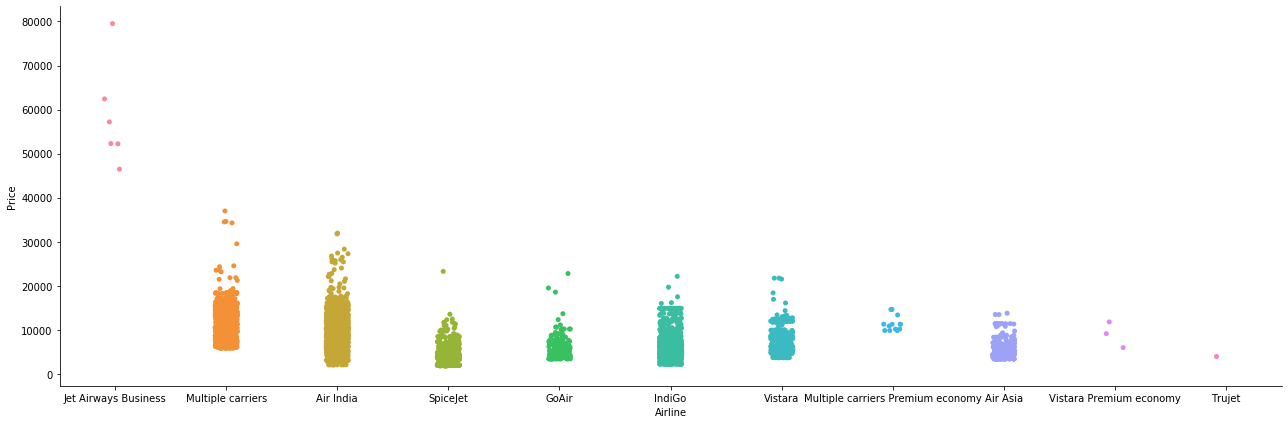

In [36]:
sns.catplot(y = 'Price', x = 'Airline', data = train.sort_values('Price', ascending = None), height = 6, aspect=3)

In [37]:
#OneHotEncoding Airline

airline = train[['Airline']]
airline = pd.get_dummies(airline, drop_first = True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0


In [38]:
train['Source'].value_counts()

Delhi       2950
Kolkata     1615
Banglore    1409
Mumbai       478
Chennai      381
Name: Source, dtype: int64

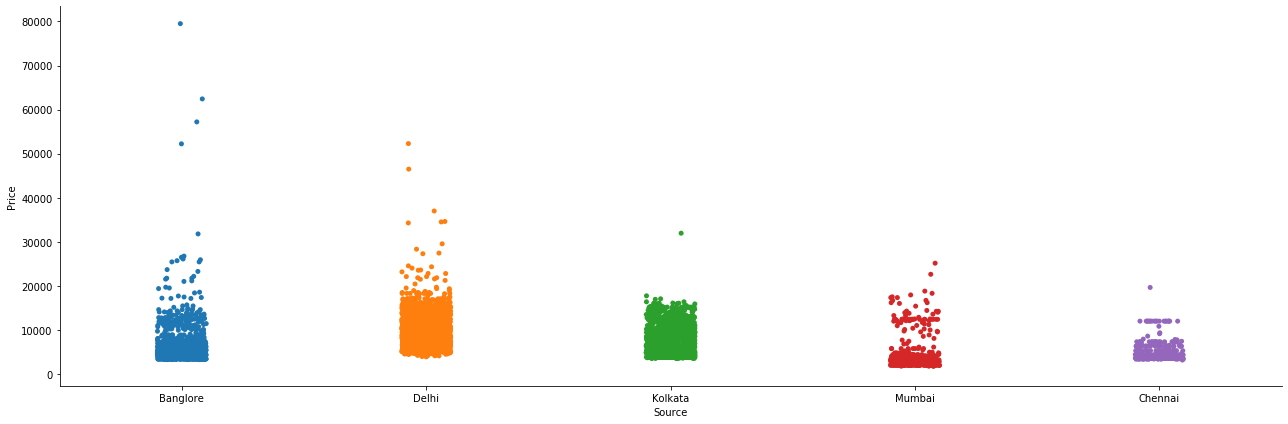

In [39]:
sns.catplot(y = 'Price', x = 'Source', data = train.sort_values('Price', ascending = None), height = 6, aspect=3)

In [40]:
#OneHotEncoding Source

source = train[['Source']]
source = pd.get_dummies(source, drop_first = True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0


In [41]:
train['Destination'].value_counts()

Cochin       2950
Banglore     1615
Delhi         895
New Delhi     514
Hyderabad     478
Kolkata       381
Name: Destination, dtype: int64

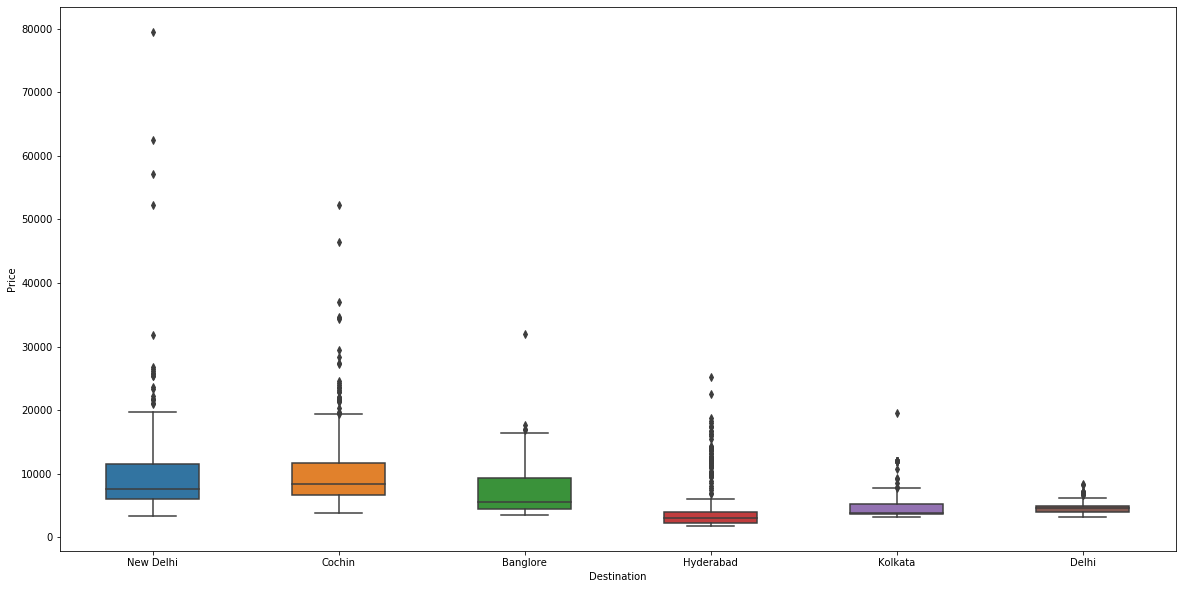

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot(y = 'Price', x = 'Destination', data = train.sort_values('Price', ascending = None), saturation=0.75, width=0.5)

In [43]:
#OneHotEncoding Destination

destination = train[['Destination']]
destination = pd.get_dummies(destination, drop_first = True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0


In [44]:
train['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'CCU → NAG → BLR',
       'BLR → NAG → DEL', 'CCU → BLR', 'DEL → BOM → COK',
       'DEL → BLR → COK', 'MAA → CCU', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → LKO → COK', 'CCU → GAU → DEL → BLR', 'CCU → MAA → BLR',
       'DEL → HYD → COK', 'BLR → BOM → DEL', 'CCU → HYD → BLR',
       'BLR → BOM → AMD → DEL', 'BOM → DEL → HYD', 'CCU → BOM → BLR',
       'DEL → MAA → COK', 'BOM → HYD', 'DEL → BHO → BOM → COK',
       'DEL → JDH → BOM → COK', 'CCU → DEL → BLR',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL', 'DEL → COK',
       'DEL → GOI → BOM → COK', 'CCU → JAI → BOM → BLR',
       'CCU → BBI → BLR', 'BLR → HYD → DEL', 'DEL → TRV → COK',
       'CCU → IXR → DEL → BLR', 'DEL → IXU → BOM → COK',
       'CCU → IXB → BLR', 'BLR → BOM → JDH → DEL',
       'DEL → UDR → BOM → COK', 'DEL → HYD → MAA → COK',
       'DEL → JAI → BOM → COK', 'DEL → IDR → BOM → COK',
       'CCU → BOM 

In [45]:
train['Additional_Info'].value_counts()

No info                         6394
No check-in baggage included     320
In-flight meal not included       96
1 Long layover                     7
Change airports                    7
No Info                            3
Business class                     3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [46]:
train.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [47]:
train.head()

,Airline,Source,Destination,Price,Day_of_Journey,Month_of_Journey,weekend,Depurture_Hour,Depurture_Min,Arrival_Hour,Arrival_Min,total_stops,duration(minutes)
0,IndiGo,Banglore,New Delhi,3897,24,3,1,22,20,1,10,0,170
1,Air India,Kolkata,Banglore,7662,1,5,0,5,50,13,15,2,445
3,IndiGo,Kolkata,Banglore,6218,12,5,1,18,5,23,30,1,325
4,IndiGo,Banglore,New Delhi,13302,1,3,0,16,50,21,35,1,285
5,SpiceJet,Kolkata,Banglore,3873,24,6,0,9,0,11,25,0,145


In [48]:
final_train = pd.concat([train, airline, source, destination], axis = 1)

In [49]:
final_train.drop(['Airline', 'Source','Destination'], axis = 1, inplace = True)


In [50]:
final_train.head()

,Price,Day_of_Journey,Month_of_Journey,weekend,Depurture_Hour,Depurture_Min,Arrival_Hour,Arrival_Min,total_stops,duration(minutes),Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897,24,3,1,22,20,1,10,0,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,7662,1,5,0,5,50,13,15,2,445,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,6218,12,5,1,18,5,23,30,1,325,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,13302,1,3,0,16,50,21,35,1,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,3873,24,6,0,9,0,11,25,0,145,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [51]:
final_train.shape

(6833, 29)

## Test Data

In [52]:
test = pd.read_excel('C:/Users/eroysar/Desktop/network kaggle/pro1/data//Test_set.xlsx')

In [53]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [54]:
test.shape

(2671, 10)

In [55]:
#preprocessing Test data

test.dropna(inplace = True)
test.isnull().sum()


test['Day_of_Journey'] = pd.to_datetime(test.Date_of_Journey, format = '%d/%m/%Y').dt.day
test['Month_of_Journey'] = pd.to_datetime(test.Date_of_Journey, format = '%d/%m/%Y').dt.month

In [56]:
test['Date_of_Journey'] = pd.to_datetime(test.Date_of_Journey, format = '%d/%m/%Y')  
day = list(test['Date_of_Journey'])
weekend = []
for i in range(len(day)):
    if day[i].weekday()<5:
        weekend.append(0)
    else:
        weekend.append(1)
        
test['weekend'] = weekend

test.drop(['Date_of_Journey'], axis=1, inplace = True)

In [57]:
test['Depurture_Hour'] = pd.to_datetime(test.Dep_Time).dt.hour
test['Depurture_Min'] = pd.to_datetime(test.Dep_Time).dt.minute
test.drop(['Dep_Time'], axis=1, inplace = True)


test['Arrival_Hour'] = pd.to_datetime(test.Arrival_Time).dt.hour
test['Arrival_Min'] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(['Arrival_Time'], axis=1, inplace = True)

In [58]:
# fixing the Total_Stops column
total_stops = list(test['Total_Stops'])

for i in range(len(total_stops)):
    if total_stops[i] == 'non-stop':
        total_stops[i] = '0 stops'
        
stops = []
for i in range(len(total_stops)):
    stops.append(int(total_stops[i].split(sep = ' ')[0]))
    
test['total_stops'] = stops
test.drop(['Total_Stops'], axis=1, inplace = True)

In [59]:
#the Duration column has to hours and minutes which needs to be placed in seperate columns

duration = list(test['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m' #adds min
        else:
            duration[i] = '0h ' + duration[i]
        
time = []
duration_hour = []
duration_min = []
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = 'h')[0]))
    duration_min.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

for i in range(len(duration)):
    time.append(duration_hour[i]*60 + duration_min[i])
    
    
test['duration(minutes)'] = time


test.drop(['Duration'], axis=1, inplace = True)

In [60]:
#droping off 'Jet Airways' data since the company was bankrupt
i = test[test.Airline == 'Jet Airways'].index
test = test.drop(i)

In [61]:
#OneHotEncoding Airline

airline = test[['Airline']]
airline = pd.get_dummies(airline, drop_first = True)

#OneHotEncoding Source

source = test[['Source']]
source = pd.get_dummies(source, drop_first = True)

#OneHotEncoding Destination

destination = test[['Destination']]
destination = pd.get_dummies(destination, drop_first = True)
test.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [62]:
final_test = pd.concat([test, airline, source, destination], axis = 1)
final_test.drop(['Airline', 'Source','Destination'], axis = 1, inplace = True)
final_test.head()

,Day_of_Journey,Month_of_Journey,weekend,Depurture_Hour,Depurture_Min,Arrival_Hour,Arrival_Min,total_stops,duration(minutes),Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1,12,5,1,6,20,10,20,1,240,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,21,5,0,8,0,21,0,1,780,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,24,6,0,23,55,2,45,0,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,12,3,0,7,30,22,35,1,905,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,1,5,0,15,15,20,30,1,315,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [63]:
final_test.shape

(1774, 27)

## Feature Selection

In [64]:
final_train.columns

Index(['Price', 'Day_of_Journey', 'Month_of_Journey', 'weekend',
       'Depurture_Hour', 'Depurture_Min', 'Arrival_Hour', 'Arrival_Min',
       'total_stops', 'duration(minutes)', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [65]:
X = final_train.loc[:, ['Day_of_Journey', 'Month_of_Journey', 'weekend',
       'Depurture_Hour', 'Depurture_Min', 'Arrival_Hour', 'Arrival_Min',
       'total_stops', 'duration(minutes)', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X.head()

,Day_of_Journey,Month_of_Journey,weekend,Depurture_Hour,Depurture_Min,Arrival_Hour,Arrival_Min,total_stops,duration(minutes),Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24,3,1,22,20,1,10,0,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,5,0,5,50,13,15,2,445,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,12,5,1,18,5,23,30,1,325,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,3,0,16,50,21,35,1,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,24,6,0,9,0,11,25,0,145,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [66]:
Y = final_train.iloc[:, 0:1]
Y.head()

,Price
0,3897
1,7662
3,6218
4,13302
5,3873


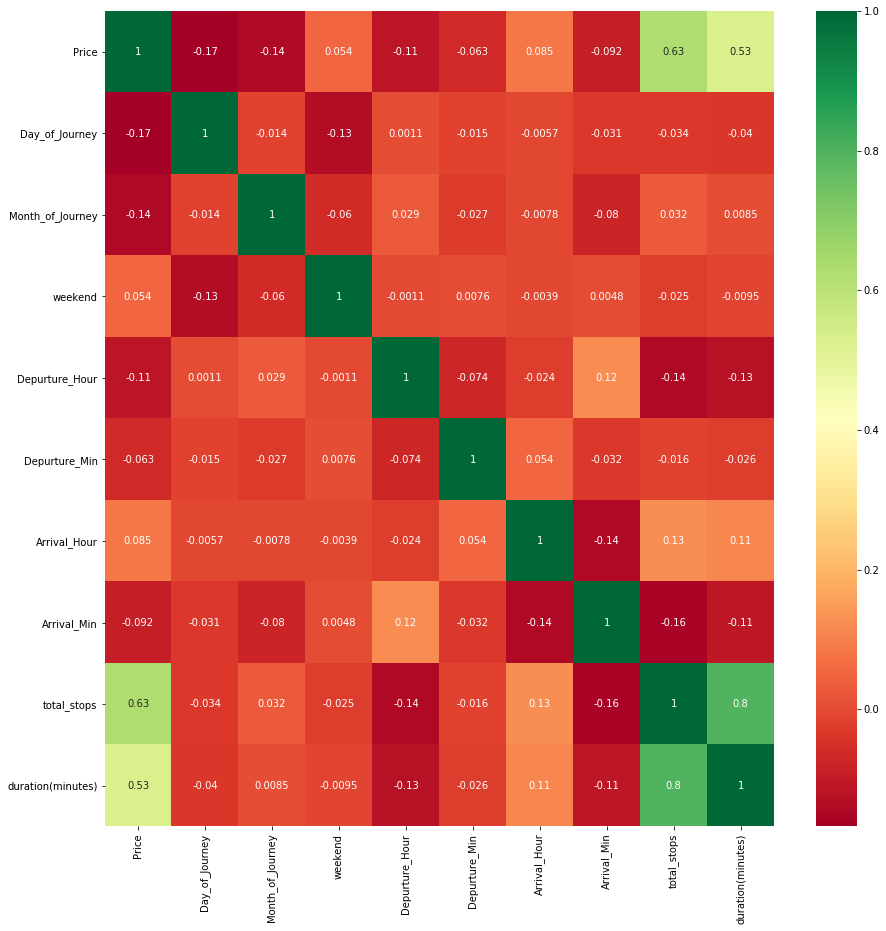

In [67]:
plt.figure(figsize =(15,15))
sns.heatmap(train.corr(), annot = True, cmap = 'RdYlGn')

plt.show()

In [68]:
#feature selection using ExtratreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
select = ExtraTreesRegressor()
select.fit(X,Y)

C:\Users\eroysar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [69]:
print(select.feature_importances_)

[8.71348978e-02 6.16089116e-02 1.68454610e-02 3.19698521e-02
 3.50806354e-02 3.27163900e-02 2.93781104e-02 2.43012743e-01
 1.32173566e-01 2.08200009e-02 3.48041980e-03 3.23837208e-02
 1.28116373e-01 3.38889797e-02 1.67667009e-03 5.46470404e-03
 1.61987493e-04 9.51056438e-03 1.30930416e-04 6.91761765e-04
 2.62522169e-02 4.70633502e-03 3.51547891e-03 3.32764744e-02
 9.90763067e-04 3.60046213e-03 8.63981100e-04 2.05476091e-02]


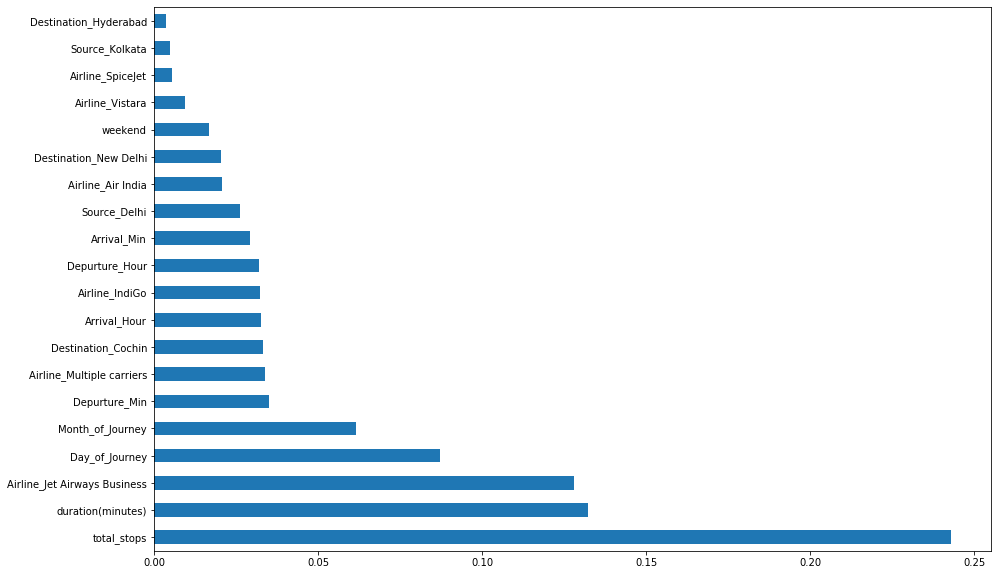

In [70]:
plt.figure(figsize =(15,10))
imp_features = pd.Series(select.feature_importances_, index = X.columns)
imp_features.nlargest(20).plot(kind = 'barh')

In [71]:
# Applying Random Forest

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.2)

In [72]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor()
regressor_RF.fit(X_train, Y_train)

C:\Users\eroysar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [73]:
y_pred = regressor_RF.predict(X_test)

In [74]:
regressor_RF.score(X_train, Y_train)

0.9751605793012531

In [75]:
regressor_RF.score(X_test, Y_test)

0.8365172689457044

Text(0, 0.5, 'y_pred')

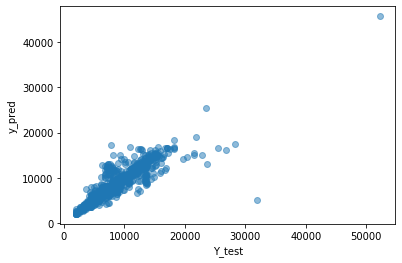

In [76]:
plt.scatter(Y_test,y_pred,alpha = 0.5)
plt.xlabel('Y_test')
plt.ylabel('y_pred')

In [77]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(Y_test,y_pred))
print('R-Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Mean Absolute Error:  746.911670057245
Mean Squared Error:  2649194.569492816
R-Mean Squared Error:  1627.634654795976


In [78]:
metrics.r2_score(Y_test,y_pred)

0.8365172689457044

## Hyperparameter Tuning ##

The hyperparameter tuning will be done using 2 techniques:

    1) RandomizedSearchCV
    2) GridSearchCV

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
#RandomSearchCV


# no. of trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# no. of features at every split
max_features = ['auto','sqrt']
# max. no. of levels
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
# min no. of nodes required to split a node
min_samples_split = [2,5,10,15,100]
# min no. of samples required at each node
min_samples_leaf = [1,2,5,10]

In [81]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [82]:
rf_random = RandomizedSearchCV(estimator = regressor_RF, param_distributions = random_grid, cv = 5, scoring = 'neg_mean_squared_error', 
                               n_iter = 10, verbose = 2, random_state = 42, n_jobs = 1 )

In [83]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s
C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  11.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.6s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   5.3s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   5.4s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   5.2s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   5.3s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   5.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   9.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=  10.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   9.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   9.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   9.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  15.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  15.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  15.1s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  15.1s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  15.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  15.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  15.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  15.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  16.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  16.1s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   7.2s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   6.9s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   8.5s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   8.0s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   6.9s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.9s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.8s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.8s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   3.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   3.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.5s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  19.4s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  18.9s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  19.5s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  21.1s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  19.0s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.2min finished
C:\Users\eroysar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [84]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [85]:
prediction = rf_random.predict(X_test)

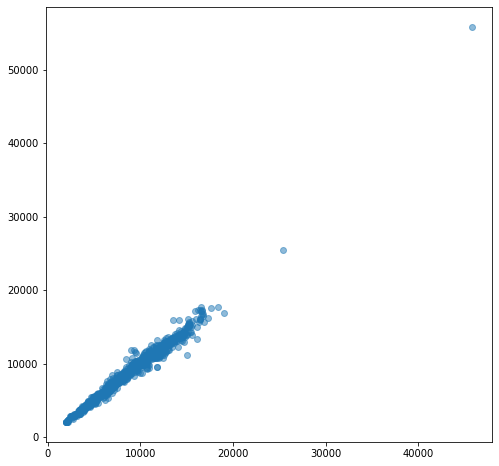

In [86]:
plt.figure(figsize = (8,8))
plt.scatter(y_pred, prediction, alpha =0.5)

In [87]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test,prediction))
print('Mean Squared Error: ',metrics.mean_squared_error(Y_test,prediction))
print('R-Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

Mean Absolute Error:  808.4987660194699
Mean Squared Error:  2620280.976241253
R-Mean Squared Error:  1618.7281971477648


### Saving the model ###

In [88]:
import pickle
# open a file where you want to store the data
file = open('flight_rf.pkl', 'wb')
# dump information into that file
pickle.dump(rf_random, file)

In [89]:
model = open('flight_rf.pkl', 'rb')
forest = pickle.load(model)

In [90]:
y_prediction = forest.predict(X_test)

In [91]:
metrics.r2_score(Y_test, y_prediction)

0.8383015369808996